# Community detection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
import pickle
from sklearn.metrics import pairwise_distances, pairwise_kernels
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import RBF
import networkx as nx
from tqdm.notebook import tqdm

import os
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning) 

import pandas as pd

import copy


import hypernetx as hnx

import pygenstability as pgs
from pygenstability import plotting

In [3]:
import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

In [4]:
import scipy as sc
import scipy.sparse as sp

In [5]:
from networkx.algorithms import community

In [6]:
import community as community_louvain

In [7]:
# CHECKPOINT
edges_e = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_Europe.pkl', 'rb'))
edges_as = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_Asia.pkl', 'rb'))
edges_af = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_Africa.pkl', 'rb'))
edges_am = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/dHSIC_Americas.pkl', 'rb'))

In [8]:
# CHECKPOINT
Adj2_e = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_e.pkl', 'rb'))
Adj2_as = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_as.pkl', 'rb'))
Adj2_af = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_af.pkl', 'rb'))
Adj2_am = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj2_am.pkl', 'rb'))

In [9]:
def get_adjacency(H):
    
    """ Construct weighted adjacency matrix for HyperGraph H
    
    Arguments
    H : Hypernetx hypergraph object
    
    """

    incidence = H.incidence_matrix().toarray()
    
    # hyperedge adjacency matrix
    C = np.matmul(incidence.T,incidence)
    A = np.matmul(incidence,incidence.T)

    R = np.matmul(incidence, np.matmul(np.diag(np.diag(C)),incidence.T))

    # defining transition matrix
    adj = R - A
    np.fill_diagonal(adj,0)

    
    return adj

In [11]:
n_labels = {}
for i in range(17):
    n_labels[i] = i+1

In [12]:
def plot_communities_nx(graph, partitions, pos, labels=n_labels):
    
    cmap = cm.get_cmap('gist_rainbow', max(partitions) + 1)
    plt.figure(figsize=(10, 7))  
    plt.axis('off')
    nx.draw_networkx_nodes(graph, pos, node_size=1000, cmap=cmap, node_color=partitions)
    labels=nx.draw_networkx_labels(graph,pos, labels=labels)
    nx.draw_networkx_edges(graph, pos, width = 0.5, alpha=0.3)
    plt.show(graph)

## Americas

In [13]:
from networkx.algorithms.community import greedy_modularity_communities

The optimal number k* of communities is 3


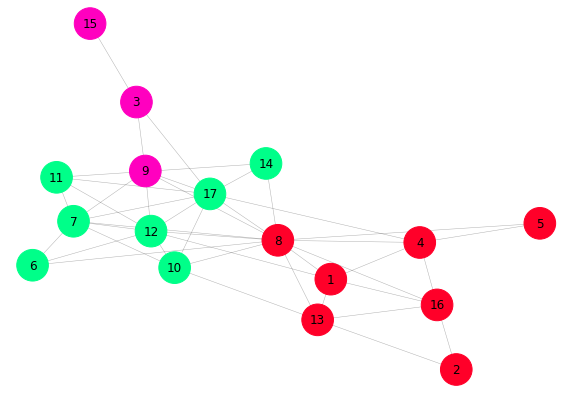

In [14]:
#Compute the greedy modularity maximisation and get the partition of the graph
G_am = nx.Graph(Adj2_am)
pos_am = nx.spring_layout(G_am)
c_am = list(greedy_modularity_communities(G_am))  
k_star_am = len(c_am)    #get the number of communities
print('The optimal number k* of communities is', k_star_am)

comm_am = [list(x) for x in c_am]  #create an array with lists of the nodes in each community

partitions_am = []
for i in range(17):
    for j in range(k_star_am):
        if i in comm_am[j]:
            partitions_am.append(j)

#plot
plot_communities_nx(G_am, partitions_am, pos_am)

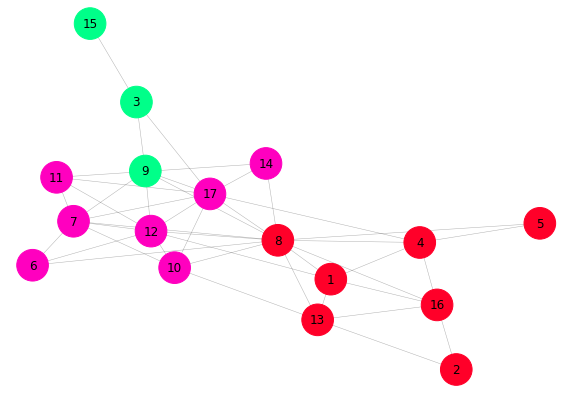

In [15]:
partitions_am_l = community_louvain.best_partition(G_am)

plot_communities_nx(G_am, list(partitions_am_l.values()), pos_am)

100%|██████████| 50/50 [00:00<00:00, 232.89it/s]


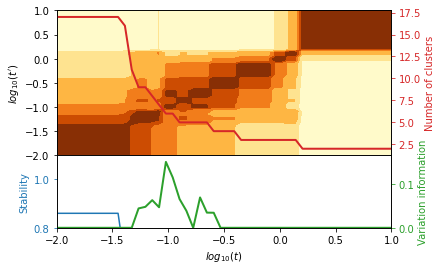

<Figure size 432x288 with 0 Axes>

In [16]:
A_am = sp.csr_matrix(Adj2_am)

results_nx_am = pgs.run(A_am, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_nx_am)
plt.figure()
plt.show()

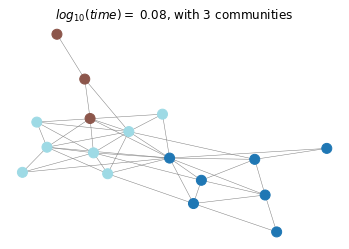

In [17]:
for u in G_am:
    G_am.nodes[u]["pos"] = pos_am[u]

plotting.plot_single_community(G_am, results_nx_am,34)

## Asia

The optimal number k* of communities is 3


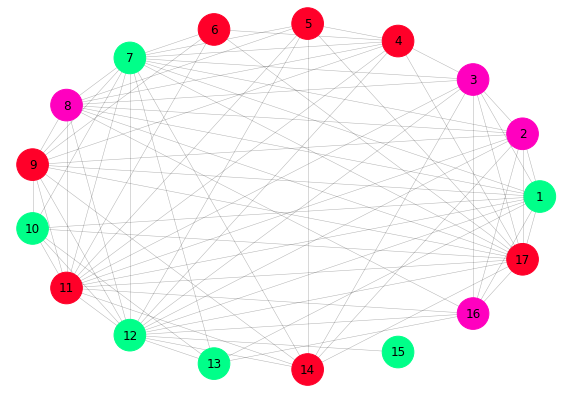

In [18]:
#Compute the greedy modularity maximisation and get the partition of the graph
G_as = nx.Graph(Adj2_as)
pos_as = nx.circular_layout(G_as)
c_as = list(greedy_modularity_communities(G_as))  
k_star_as = len(c_as)    #get the number of communities
print('The optimal number k* of communities is', k_star_as)

comm_as = [list(x) for x in c_as]  #create an array with lists of the nodes in each community
partitions_as = []
for i in range(17):
    for j in range(k_star_as):
        if i in comm_as[j]:
            partitions_as.append(j)
            
#plot
plot_communities_nx(G_as, partitions_as, pos_as)

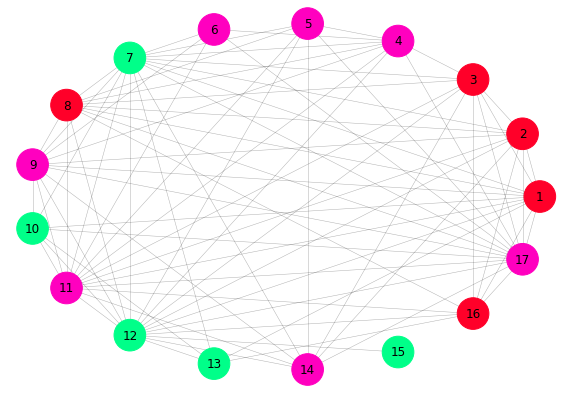

In [19]:
partitions_as_l = community_louvain.best_partition(G_as)

plot_communities_nx(G_as, list(partitions_as_l.values()), pos_as)

100%|██████████| 50/50 [00:00<00:00, 220.12it/s]


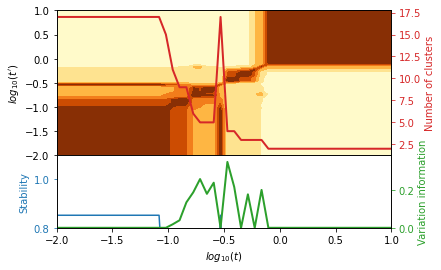

<Figure size 432x288 with 0 Axes>

In [20]:
A_as = sp.csr_matrix(Adj2_as)

results_nx_as = pgs.run(A_as, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_nx_as)
plt.figure()
plt.show()

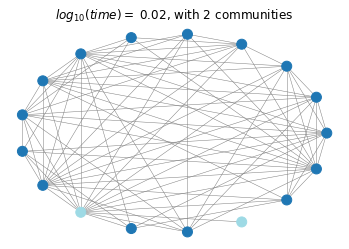

In [22]:
for u in G_as:
    G_as.nodes[u]["pos"] = pos_as[u]

plotting.plot_single_community(G_as, results_nx_as,33)

# Network with weights


In [23]:
# CHECKPOINT
Aw_e = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_e.pkl', 'rb'))
Aw_as = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_as.pkl', 'rb'))
Aw_af = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_af.pkl', 'rb'))
Aw_am = pickle.load(open('/Users/saravallejomengod/MathsYear4/M4R/utils/Data/dHSIC_found/Adj_am.pkl', 'rb'))

## Americas

The optimal number k* of communities is 5


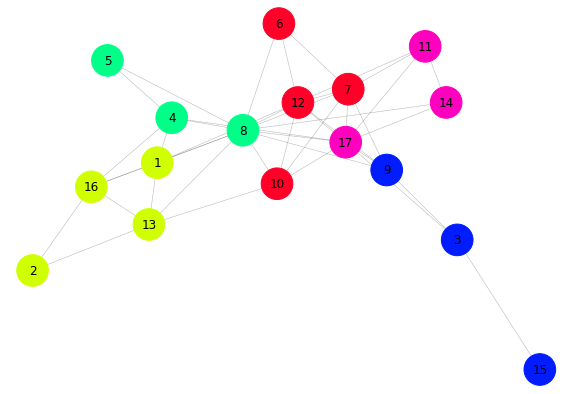

In [24]:
#Compute the greedy modularity maximisation and get the partition of the graph
G_w_am = nx.Graph(Aw_am)
pos_w_am = nx.spring_layout(G_w_am)
c_w_am = list(greedy_modularity_communities(G_w_am))  
k_star_w_am = len(c_w_am)    #get the number of communities
print('The optimal number k* of communities is', k_star_w_am)

comm_w_am = [list(x) for x in c_w_am]  #create an array with lists of the nodes in each community

partitions_w_am = []
for i in range(17):
    for j in range(k_star_w_am):
        if i in comm_w_am[j]:
            partitions_w_am.append(j)

#plot
plot_communities_nx(G_w_am, partitions_w_am, pos_w_am)

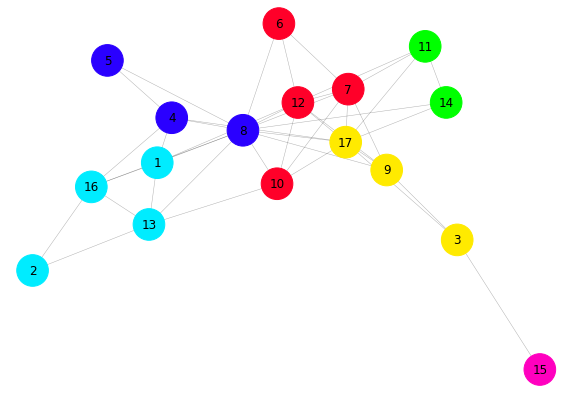

In [25]:
partitions_w_am_l = community_louvain.best_partition(G_w_am)

plot_communities_nx(G_w_am, list(partitions_w_am_l.values()), pos_w_am)

100%|██████████| 50/50 [00:00<00:00, 224.20it/s]


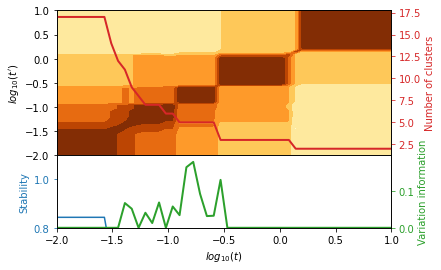

<Figure size 432x288 with 0 Axes>

In [26]:
Aw_am_sp = sp.csr_matrix(Aw_am)

results_nx_w_am = pgs.run(Aw_am_sp, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_nx_w_am)
plt.figure()
plt.show()

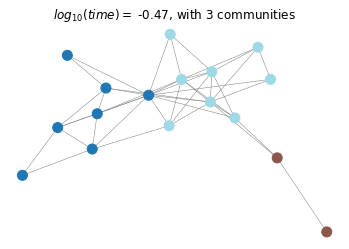

In [27]:
for u in G_w_am:
    G_w_am.nodes[u]["pos"] = pos_w_am[u]

plotting.plot_single_community(G_w_am, results_nx_w_am,25)

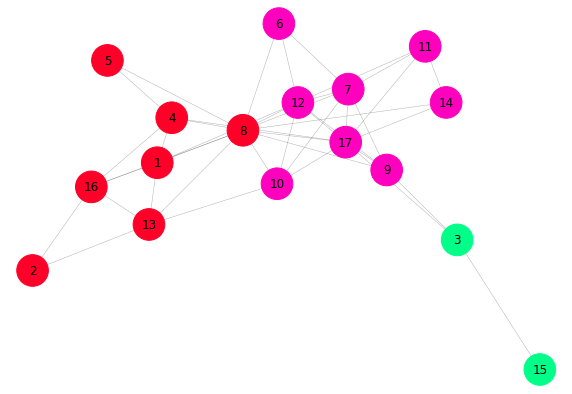

In [28]:
plot_communities_nx(G_w_am, results_nx_w_am["community_id"][25], pos_w_am)

## Asia

The optimal number k* of communities is 11


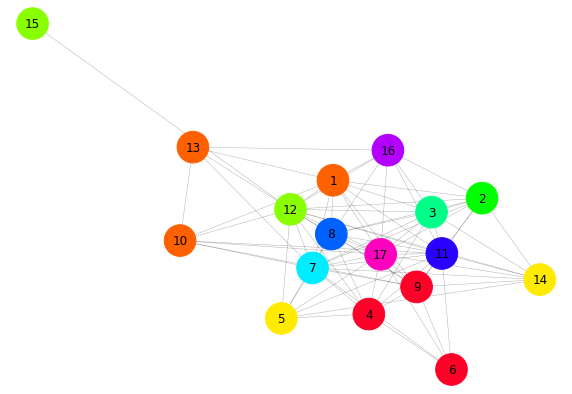

In [29]:
#Compute the greedy modularity maximisation and get the partition of the graph
G_w_as = nx.Graph(Aw_as)
pos_w_as = nx.spring_layout(G_w_as)
c_w_as = list(greedy_modularity_communities(G_w_as))  
k_star_w_as = len(c_w_as)    #get the number of communities
print('The optimal number k* of communities is', k_star_w_as)

comm_w_as = [list(x) for x in c_w_as]  #create an array with lists of the nodes in each community

partitions_w_as = []
for i in range(17):
    for j in range(k_star_w_as):
        if i in comm_w_as[j]:
            partitions_w_as.append(j)

#plot
plot_communities_nx(G_w_as, partitions_w_as, pos_w_as)

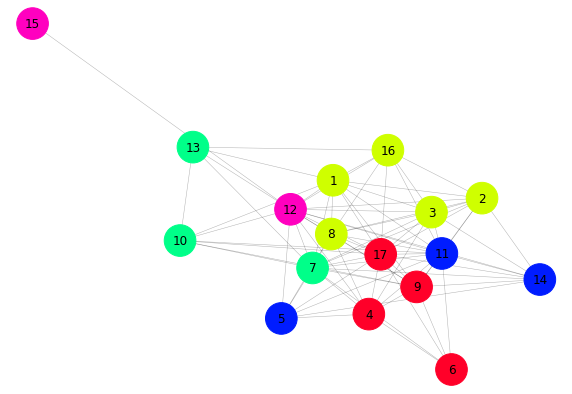

In [30]:
partitions_w_as_l = community_louvain.best_partition(G_w_as)

plot_communities_nx(G_w_as, list(partitions_w_as_l.values()), pos_w_as)

100%|██████████| 50/50 [00:00<00:00, 115.98it/s]


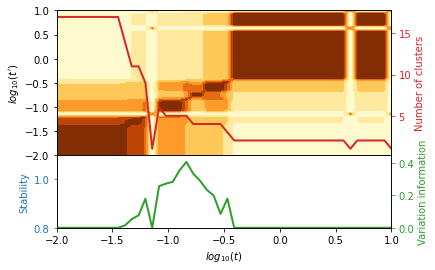

<Figure size 432x288 with 0 Axes>

In [31]:
Aw_as_sp = sp.csr_matrix(Aw_as)

results_nx_w_as = pgs.run(Aw_as_sp, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_nx_w_as)
plt.figure()
plt.show()

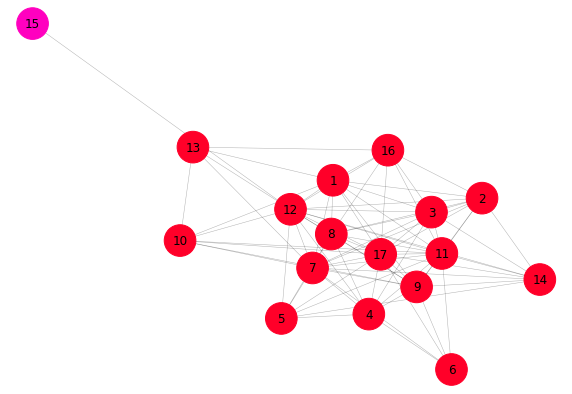

In [32]:
plot_communities_nx(G_w_as, results_nx_w_as["community_id"][28], pos_w_as)

# Hypergraph

In [33]:
H_am = hnx.Hypergraph(edges_am)

graph_am = sp.csr_matrix(get_adjacency(H_am))

# construct network object just for plotting
g_am = nx.Graph(graph_am)
pos_am_h = nx.circular_layout(g_am, scale=1)
for u in g_am:
    g_am.nodes[u]["pos"] = pos_am_h[u]

In [35]:
H_am.nodes

EntitySet(_:Nodes,['9', '7', '12', '3', '17', '16', '6', '1', '8', '2', '15', '13', '14', '11', '10', '5', '4'],{})

In [60]:
n_labels_am = {}
nodes_am = ['9', '7', '12', '3', '17', '16', '6', '1', '8', '2', '15', '13', '14', '11', '10', '5', '4']
for i in range(len(nodes_am)):
    n_labels_am[i] = nodes_am[i]

100%|██████████| 50/50 [00:00<00:00, 281.29it/s]


<Figure size 432x288 with 0 Axes>

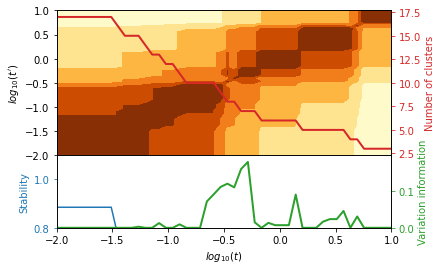

<Figure size 432x288 with 0 Axes>

In [37]:
graph_am = graph_am.astype(np.float64)

results_hg_am = pgs.run(graph_am, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_hg_am)
plt.figure()


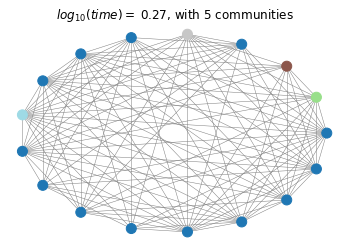

In [38]:
plotting.plot_single_community(g_am, results_hg_am,37)

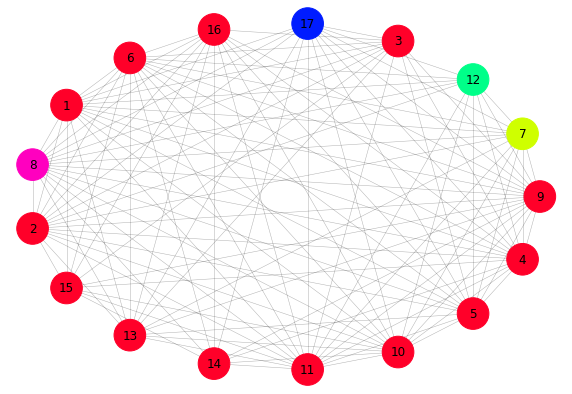

In [61]:
plot_communities_nx(g_am, results_hg_am["community_id"][37], pos_am_h, labels=n_labels_am)

In [40]:
H_e = hnx.Hypergraph(edges_e)

graph_e = sp.csr_matrix(get_adjacency(H_e))

# construct network object just for plotting
g_e = nx.Graph(graph_e)
pos_e_h = nx.circular_layout(g_e, scale=1)
for u in g_e:
    g_e.nodes[u]["pos"] = pos_e_h[u]

In [49]:

np.count_nonzero(get_adjacency(H_af)==0)

115

In [50]:
H_e.nodes

EntitySet(_:Nodes,['9', '7', '12', '3', '17', '16', '6', '1', '2', '8', '15', '13', '14', '11', '10', '5', '4'],{})

In [62]:
n_labels_e = {}
nodes_e = ['9', '7', '12', '3', '17', '16', '6', '1', '2', '8', '15', '13', '14', '11', '10', '5', '4']
for i in range(len(nodes_e)):
    n_labels_e[i] = nodes_e[i]

100%|██████████| 50/50 [00:00<00:00, 259.49it/s]


<Figure size 432x288 with 0 Axes>

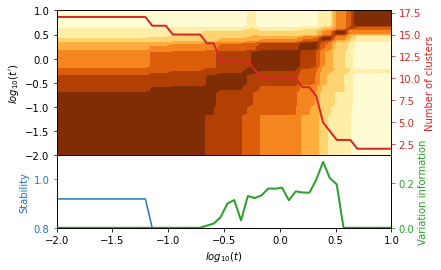

<Figure size 432x288 with 0 Axes>

In [52]:
graph_e = graph_e.astype(np.float64)

results_hg_e = pgs.run(graph_e, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_hg_e)
plt.figure()


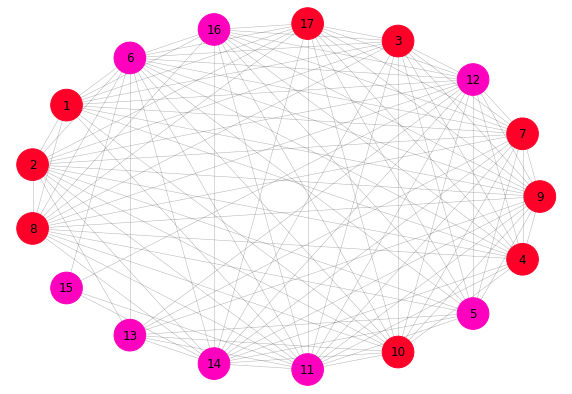

In [63]:
plot_communities_nx(g_e, results_hg_e["community_id"][47], pos_e_h, labels=n_labels_e)

In [45]:
H_as = hnx.Hypergraph(edges_as)

graph_as = sp.csr_matrix(get_adjacency(H_as))

# construct network object just for plotting
g_as = nx.Graph(graph_as)
pos_as_h = nx.circular_layout(g_as, scale=1)
for u in g_as:
    g_as.nodes[u]["pos"] = pos_as_h[u]

In [55]:
H_as.nodes

EntitySet(_:Nodes,['9', '7', '12', '3', '17', '16', '6', '1', '8', '2', '15', '13', '14', '11', '10', '5', '4'],{})

In [64]:
n_labels_as = {}
nodes_as = ['9', '7', '12', '3', '17', '16', '6', '1', '8', '2', '15', '13', '14', '11', '10', '5', '4']
for i in range(len(nodes_as)):
    n_labels_as[i] = nodes_as[i]

100%|██████████| 50/50 [00:00<00:00, 136.87it/s]


<Figure size 432x288 with 0 Axes>

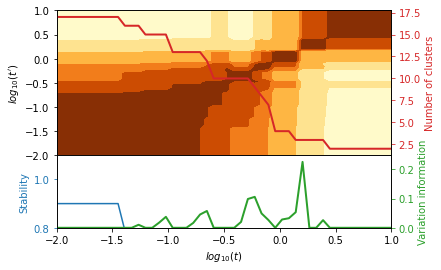

<Figure size 432x288 with 0 Axes>

In [58]:
graph_as = graph_as.astype(np.float64)

results_hg_as = pgs.run(graph_as, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_hg_as)
plt.figure()


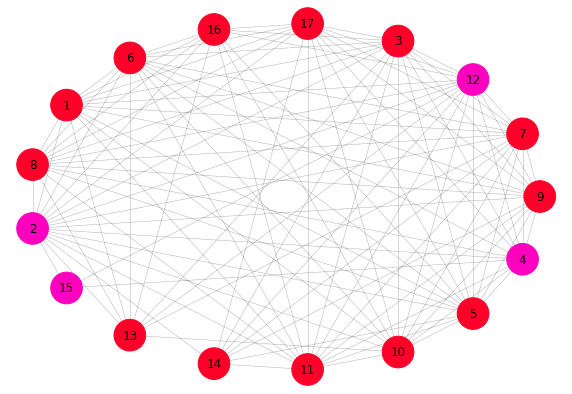

In [65]:
plot_communities_nx(g_as, results_hg_as["community_id"][42], pos_as_h, labels=n_labels_as)

In [48]:
H_af = hnx.Hypergraph(edges_af)

graph_af = sp.csr_matrix(get_adjacency(H_af))

# construct network object just for plotting
g_af = nx.Graph(graph_af)
pos_af_h = nx.spring_layout(g_af, scale=1)
for u in g_af:
    g_af.nodes[u]["pos"] = pos_af_h[u]

In [66]:
H_af.nodes

EntitySet(_:Nodes,['9', '7', '12', '3', '17', '16', '6', '1', '8', '2', '15', '13', '14', '11', '10', '5', '4'],{})

In [67]:
n_labels_af = {}
nodes_af = ['9', '7', '12', '3', '17', '16', '6', '1', '8', '2', '15', '13', '14', '11', '10', '5', '4']
for i in range(len(nodes_af)):
    n_labels_af[i] = nodes_af[i]

100%|██████████| 50/50 [00:00<00:00, 262.62it/s]


<Figure size 432x288 with 0 Axes>

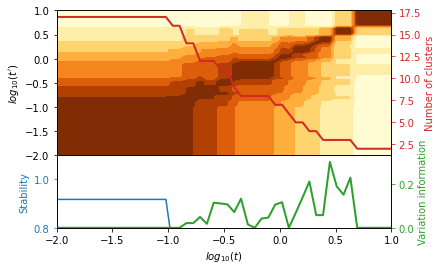

<Figure size 432x288 with 0 Axes>

In [68]:
graph_af = graph_af.astype(np.float64)

results_hg_af = pgs.run(graph_af, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_hg_af)
plt.figure()

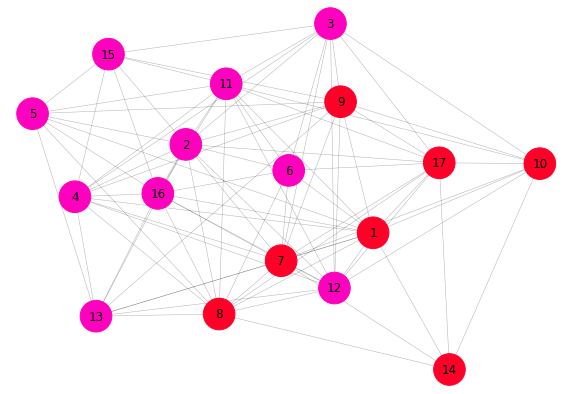

In [69]:
plot_communities_nx(g_af, results_hg_af["community_id"][45], pos_af_h, labels=n_labels_af)

# Restrict to 3 edges


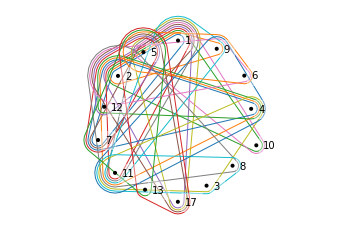

In [70]:
Ham_restrict_edges3 = H_am.restrict_to_edges(list(e for e in edges_am if len(edges_am[e])==3))
hnx.draw(Ham_restrict_edges3, pos=nx.spring_layout(Ham_restrict_edges3), with_edge_labels=False)

In [71]:
graph_am3 = sp.csr_matrix(get_adjacency(Ham_restrict_edges3))

# construct network object just for plotting
g_am3 = nx.Graph(graph_am3)
pos_am_h3 = nx.spring_layout(g_am3, scale=1)
for u in g_am3:
    g_am3.nodes[u]["pos"] = pos_am_h3[u]

In [72]:
Ham_restrict_edges3.nodes

EntitySet(_:Nodes,['9', '7', '12', '3', '17', '6', '1', '2', '8', '13', '11', '10', '5', '4'],{})

In [73]:
n_labels_am3 = {}
nodes_am3 = ['9', '7', '12', '3', '17', '6', '1', '2', '8', '13', '11', '10', '5', '4']
for i in range(len(nodes_am3)):
    n_labels_am3[i] = nodes_am3[i]

100%|██████████| 50/50 [00:00<00:00, 296.33it/s]


<Figure size 432x288 with 0 Axes>

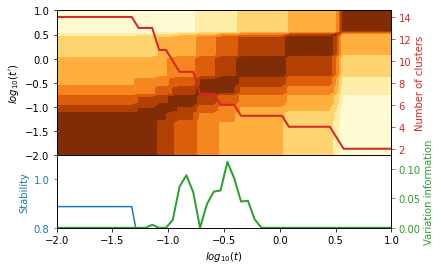

<Figure size 432x288 with 0 Axes>

In [74]:
graph_am3 = graph_am3.astype(np.float64)

results_hg_am3 = pgs.run(graph_am3, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_hg_am3)
plt.figure()

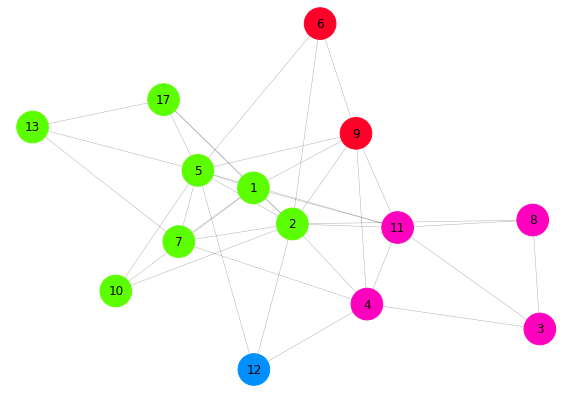

In [75]:
plot_communities_nx(g_am3, results_hg_am3["community_id"][36], pos_am_h3, labels=n_labels_am3)

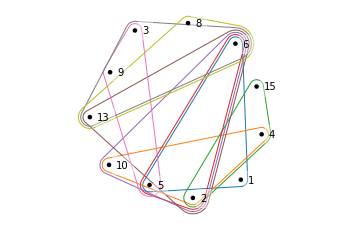

In [76]:
Has_restrict_edges3 = H_as.restrict_to_edges(list(e for e in edges_as if len(edges_as[e])==3))
hnx.draw(Has_restrict_edges3, pos=nx.spring_layout(Has_restrict_edges3), with_edge_labels=False)

In [77]:
graph_as3 = sp.csr_matrix(get_adjacency(Has_restrict_edges3))

# construct network object just for plotting
g_as3 = nx.Graph(graph_as3)
pos_as_h3 = nx.spring_layout(g_as3, scale=1)
for u in g_as3:
    g_as3.nodes[u]["pos"] = pos_as_h3[u]
    
Has_restrict_edges3.nodes

EntitySet(_:Nodes,['9', '3', '6', '1', '2', '15', '8', '13', '10', '5', '4'],{})

In [78]:
n_labels_as3 = {}
nodes_as3 = ['9', '3', '6', '1', '2', '15', '8', '13', '10', '5', '4']
for i in range(len(nodes_as3)):
    n_labels_as3[i] = nodes_as3[i]

100%|██████████| 50/50 [00:00<00:00, 355.62it/s]


<Figure size 432x288 with 0 Axes>

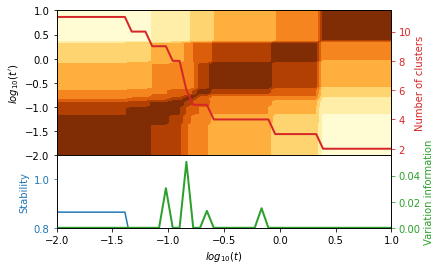

<Figure size 432x288 with 0 Axes>

In [79]:
graph_as3 = graph_as3.astype(np.float64)

results_hg_as3 = pgs.run(graph_as3, min_time=-2, max_time=1, n_time=50, constructor='continuous_combinatorial')
plotting.plot_scan(results_hg_as3)
plt.figure()

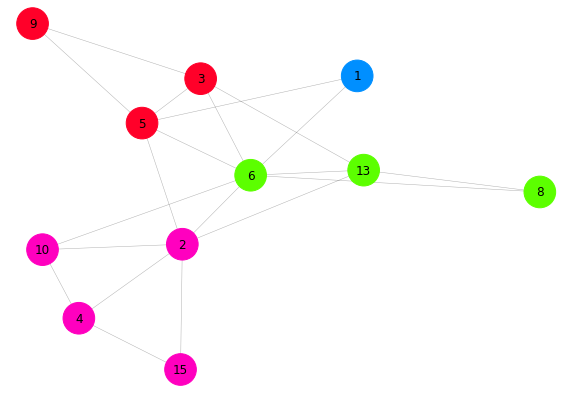

In [81]:
plot_communities_nx(g_as3, results_hg_as3["community_id"][26], pos_as_h3, labels=n_labels_as3)